# Assignment 2 - CIC-1205

## Exercise 5 - Cross Validation

Student: Balthazar Paixão


In [1]:
data_folder = "../class-repo/cic1205/data/atmoseer/"
pickle_files = [
    "A602.pickle",
    "A621.pickle",
    "A627.pickle",
    "A636.pickle",
    "A652.pickle",
]

In [2]:
import numpy as np
import pickle

from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
SEED = 57

data_folder = "../class-repo/cic1205/data/atmoseer/"
pickle_files = [
    "A602.pickle",
    "A621.pickle",
    "A627.pickle",
    "A636.pickle",
    "A652.pickle",
]


def transform_array(arr: np.ndarray) -> list:
    """
    •0 → NONE
    •(0, 5] → WEAK
    •(5, 25] → MODERATE
    •(25,50] → STRONG
    •(50, ∞] → EXTREME
    """
    arr = arr.tolist()
    for i in range(len(arr)):
        if arr[i][0] == 0:
            arr[i] = 0  # 'NONE'
        elif arr[i][0] > 0 and arr[i][0] <= 5:
            arr[i] = 1  # 'WEAK'
        elif arr[i][0] > 5 and arr[i][0] <= 25:
            arr[i] = 2  # 'MODERATE'
        elif arr[i][0] > 25 and arr[i][0] <= 50:
            arr[i] = 3  # 'STRONG'
        elif arr[i][0] > 50:
            arr[i] = 4  # 'EXTREME'
    return arr


def count_values_list(lst: list) -> dict:
    """
    Count the number of times each value appears in a list
    """
    dict_counter = {}
    for i in lst:
        dict_counter[i] = dict_counter.get(i, 0) + 1

    return dict_counter

# A652

In [4]:
a652 = f"{data_folder}{pickle_files[4]}"
file = open(a652, "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(file)

y_train = transform_array(y_train)
y_val = transform_array(y_val)
y_test = transform_array(y_test)

X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))


In [5]:
params = {
    "n_components": [2, 3, 4, 5],
}

pca = PCA(random_state=SEED)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

grid_search = GridSearchCV(
    pca, params, cv=skf, verbose=1, n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=57, shuffle=True),
             estimator=PCA(random_state=57), n_jobs=-1,
             param_grid={'n_components': [2, 3, 4, 5]}, verbose=1)

In [6]:
print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
print(f"Best estimator: {grid_search.best_estimator_}")
print(f"Best index: {grid_search.best_index_}")

Best params: {'n_components': 5}
Best score: 29.38721168348364
Best estimator: PCA(n_components=5, random_state=57)
Best index: 3


Explained variance ratio: [0.39752414 0.37469502 0.09636396 0.05377743 0.03634281]


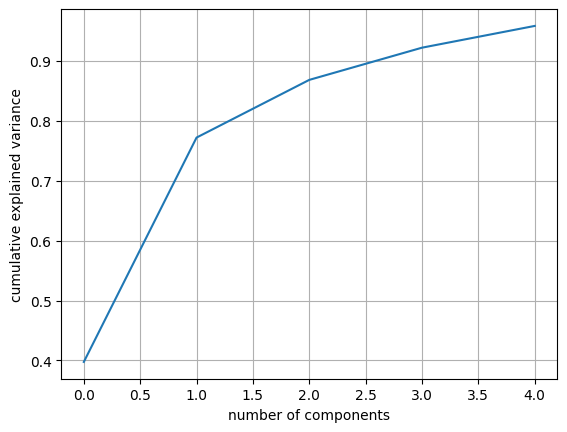

In [7]:
pca = PCA(**grid_search.best_params_, random_state=SEED)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
#plot
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

LR = LogisticRegression(random_state=SEED, max_iter=1000)
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8765    4    0    0    0]
 [ 737   20    0    0    0]
 [  48    2    0    0    0]
 [   4    0    0    0    0]
 [   2    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8769
           1       0.77      0.03      0.05       757
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.92      9582
   macro avg       0.34      0.21      0.20      9582
weighted avg       0.90      0.92      0.88      9582

